In [8]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth, KMeans
from sklearn.datasets.samples_generator import make_blobs
from itertools import cycle
from PIL import Image
import cv2 as cv2
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# from skimage.filters import threshold_multiotsu
import skimage.color as color
from skimage import filters
%matplotlib inline
pylab.rcParams['figure.figsize'] = 20, 15

We will load in the image and display the original image for reference.

(631, 930, 3)


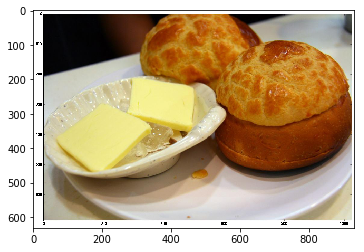

In [2]:
image = cv2.imread('bread.png')

print(image.shape)
original_shape = image.shape

# Flatten image.
X = np.reshape(image, [-1, 3])

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

# Mean Shift Clusterring


In [3]:
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=100)
print(bandwidth)

37.42687127714149


In [4]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=37.42687127714149, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=None, seeds=None)

In [5]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
ms_image = np.reshape(labels, original_shape[:2])  # Just take size, ignore RGB channels.

In [6]:
print(cluster_centers)

[[193.89447494 205.08901231 209.03833717]
 [ 11.84079847 101.25355952 177.28276247]
 [  3.70471882  45.9428242  121.54262906]
 [254.34799019 254.44840403 254.38385638]
 [141.15435174 230.98859847 237.6538152 ]
 [  4.9463337    4.89170782   6.84955649]
 [ 68.45819891  98.45430635 122.04404545]]


(-0.5, 929.5, 630.5, -0.5)

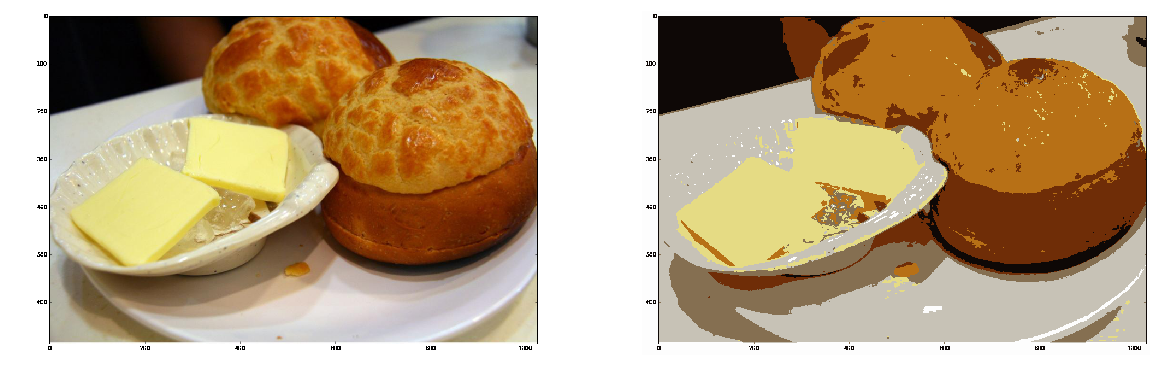

In [107]:
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
ms_labelized = cv2.cvtColor(color.label2rgb(ms_image, image, kind='avg'),cv2.COLOR_BGR2RGB)
plt.imshow(ms_labelized)
plt.axis('off')

# K-Means Clusterring


In [105]:
kmeans_cluster = KMeans(n_clusters=7)
kmeans_cluster.fit(X)
k_labels = kmeans_cluster.labels_

(-0.5, 929.5, 630.5, -0.5)

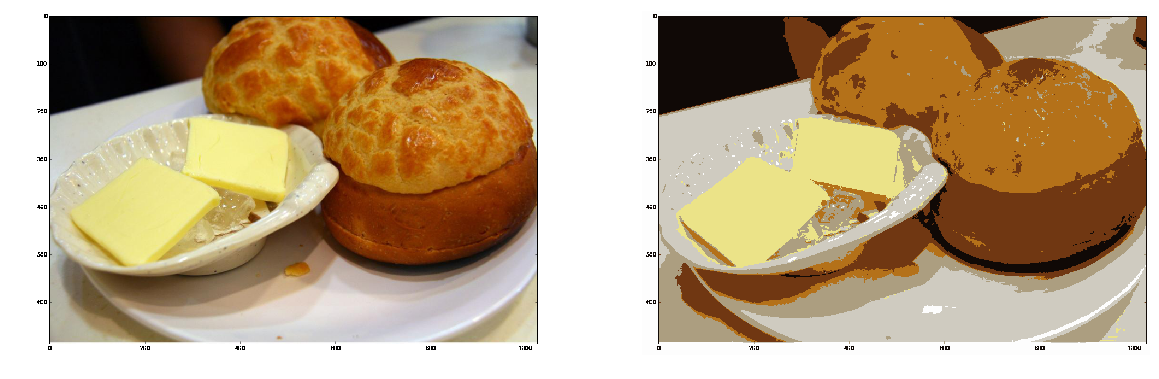

In [106]:
k_image = np.reshape(k_labels, original_shape[:2])  # Just take size, ignore RGB channels.
plt.figure(2)
plt.title('K-Means Clusterring')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
k_labelized = cv2.cvtColor(color.label2rgb(k_image, image, kind='avg'),cv2.COLOR_BGR2RGB)
plt.imshow(k_labelized)
plt.axis('off')

# Otsu's Thresholding


(-0.5, 929.5, 630.5, -0.5)

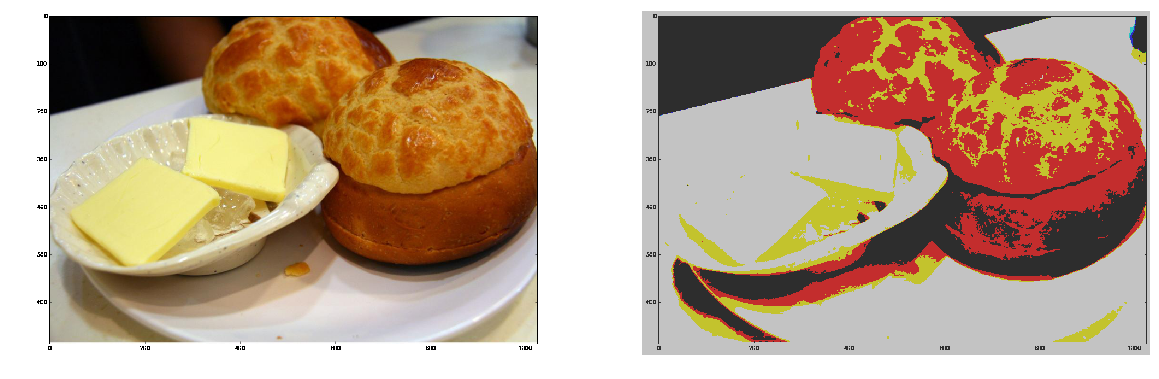

In [12]:
thresholds = filters.threshold_otsu(image, nbins=256)
mask = (image > thresholds)*255
plt.figure(2)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1, 2, 2)
k_labelized = cv2.cvtColor(color.label2rgb(mask, image, kind='avg'),cv2.COLOR_BGR2RGB)
plt.imshow(k_labelized)
plt.axis('off')